<a href="https://colab.research.google.com/github/shahdevansh28/ML/blob/main/ML_Lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2,cluster_std=0.2, random_state=0)
print(X,"\n")
print(y)

[[ 2.17058568  0.85600391]
 [ 0.79717677  4.38116783]
 [ 2.24471791  0.86666164]
 [ 0.65349051  4.26123927]
 [ 0.76655949  4.01978374]
 [ 0.90668765  4.33505712]
 [-1.75639774  2.83031825]
 [-1.33701985  2.93539251]
 [ 2.18972647  0.97915603]
 [ 0.84940566  4.23123909]
 [ 1.12208819  4.32958391]
 [ 1.22232821  4.5442633 ]
 [ 2.14840001  0.59041492]
 [ 1.28282592  4.59765908]
 [-1.67585498  2.75259455]
 [ 2.42877931  1.07887259]
 [-1.54659452  2.7851866 ]
 [ 0.81364082  3.95853081]
 [-1.54055233  3.26055081]
 [-1.74778068  2.92831528]
 [-1.65562769  2.47320163]
 [-1.53476058  2.68426356]
 [-1.39887771  2.59449105]
 [ 0.79871293  3.90762803]
 [ 1.841117    1.10855401]
 [ 2.08064994  0.97806153]
 [ 1.90128431  1.0055135 ]
 [ 1.82223755  1.07782896]
 [-1.60074038  2.87000643]
 [-1.3725459   3.08258309]
 [ 1.00507879  4.59464203]
 [ 2.35291796  1.2768415 ]
 [ 1.97254373  0.7481727 ]
 [ 1.27508589  4.26275567]
 [-1.61801051  2.92137809]
 [-1.05027506  3.10677816]
 [ 0.95562631  4.38590703]
 

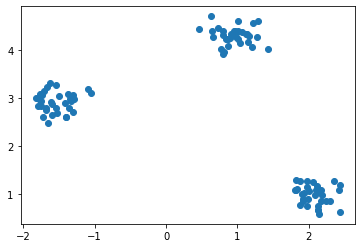

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x = [X[0] for X in X],y = [X[1] for X in X])
plt.show()


[[ 2.0720792   0.98848385]
 [-1.538563    2.91165191]
 [ 0.95164831  4.28882085]]
[0 2 0 2 2 2 1 1 0 2 2 2 0 2 1 0 1 2 1 1 1 1 1 2 0 0 0 0 1 1 2 0 0 2 1 1 2
 0 0 1 1 0 0 2 2 2 0 0 1 1 1 0 2 0 1 1 0 0 2 0 0 1 1 1 1 0 2 1 0 2 1 2 2 0
 0 2 2 2 1 0 2 2 0 2 0 2 2 2 0 2 0 0 1 1 1 1 2 2 1 1]


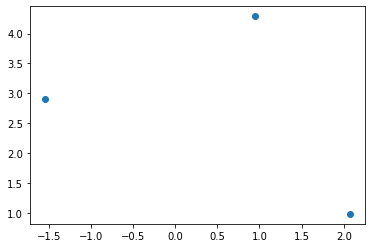

In [ ]:
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters = 3).fit(X)

# Get the cluster centroids
centers = kmeans.cluster_centers_
print(centers)

# Get the cluster labels
labels = kmeans.labels_
print(labels)


# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(centers[:,0],centers[:,1])

In [ ]:
from sklearn.metrics import silhouette_score


score = silhouette_score(X,y)
print(score)

0.8816040239688525


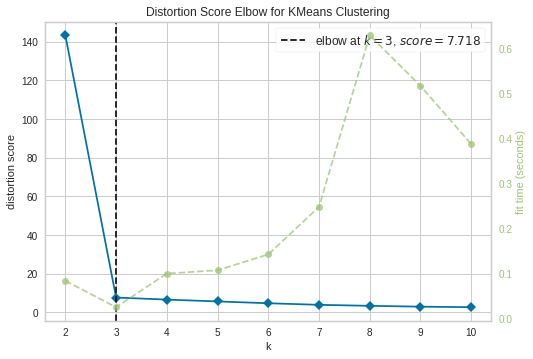

In [ ]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans()
# Instantiate the KElbowVisualizer with the number of clusters and the metric

# Fit the data and visualize
visualizer = KElbowVisualizer(model)

visualizer.fit(X)
visualizer.show()

**Hand Written Digit Recognition**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
digits = load_digits()
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'frame': None, 'feature_names': ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', '

In [ ]:
digits.keys() #Dataset loaded is a dictionary
# data : flattened arrays/tensors used for clustering
# target : label associated with flattened array
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
